# GJ 3998

Data are from <a href="https://ui.adsabs.harvard.edu/abs/2016A%26A...593A.117A/abstract">Affer et al. (2016)</a>

#### We want to emphasize that Affer et al. did a thorough, high-quality analysis of the GJ 3998 dataset. Even though we question whether GJ 3998 b and c are true planet detections, the authors used every tool available at the time of publication to vet their planet candidates. It's inevitable that as the RV community learns more about stellar activity, many previous planet discoveries will be revealed as stellar signals. 

#### The main reason we chose this dataset to analyze is because the authors reported activity indicators along with the RVs, which not all planet-search teams do. The HADES team is very conscientious about making their observational data accessible.

### Set up <tt>python</tt> environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.insert(0, '/Users/sdr/NWelch/src/')

import TimeSeries
import Bivariate as Bi

### Read data

T stands for Terra, N stands for not-Terra, so RVT are the RVs from the Terra pipeline, ST are the S-indices from the Terra pipeline, SN are the S-indices from the DRS pipeline, etc.

In [2]:
data = pd.read_csv('GJ3998_Affer16.txt', delim_whitespace=True,
                  header=None, comment='#', 
                  names=['JD-2456000', 'SNR', 'RVT', 'eRVT', 'RVN', 'eRVN', 'ST', 'eST',
                         'HaT', 'eHaT', 'SN', 'eSN', 'HaN', 'eHaN'])
data

,JD-2456000,SNR,RVT,eRVT,RVN,eRVN,ST,eST,HaT,eHaT,SN,eSN,HaN,eHaN
0,439.55832,54.1,-3.661,0.959,-44810.390,1.403,1.1013,0.0087,0.8357,0.0111,0.1025,0.0003,0.0591,0.0002
1,439.65014,54.9,-4.089,0.839,-44810.869,1.372,1.0918,0.0085,0.8366,0.0106,0.0991,0.0004,0.0592,0.0001
2,441.56648,56.9,3.221,0.945,-44805.754,1.317,1.1114,0.0083,0.8370,0.0098,0.1026,0.0002,0.0593,0.0001
3,442.54349,62.7,-0.153,0.819,-44806.802,1.185,1.1127,0.0075,0.8367,0.0086,0.1016,0.0003,0.0591,0.0001
4,443.53644,36.0,2.606,1.316,-44800.675,2.070,1.0772,0.0126,0.8348,0.0143,0.0982,0.0002,0.0589,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1293.38288,34.0,-8.067,1.253,-44816.542,2.101,1.1373,0.0144,0.8421,0.0146,0.0990,0.0002,0.0591,0.0001
132,1297.38013,26.9,5.295,1.625,-44803.143,2.287,1.0471,0.0167,0.8452,0.0128,0.0944,0.0004,0.0592,0.0001
133,1306.34245,44.4,-0.482,0.981,-44806.765,1.657,1.2165,0.0117,0.8527,0.0143,0.1075,0.0001,0.0600,0.0001
134,1307.33712,51.4,1.786,0.792,-44803.888,1.414,1.3772,0.0108,0.8726,0.0114,0.1190,0.0003,0.0619,0.0002


### Quick plot of the RV data

Text(0.5, 1.0, 'GJ 3998')

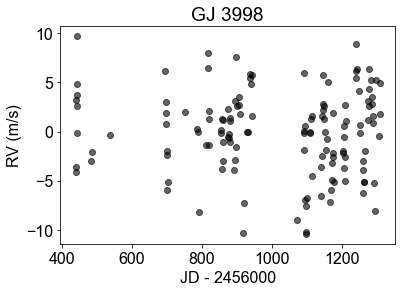

In [3]:
plt.scatter(data['JD-2456000'].to_numpy(), data['RVT'].to_numpy(), color='k', edgecolor='k', alpha=0.6)
plt.xlabel('JD - 2456000')
plt.ylabel('RV (m/s)')
plt.title('GJ 3998')

Before I compute any magnitude-squared coherences, I always start with a quick univariate analysis of each set of observables.

### Create <tt>TimeSeries</tt> objects for univariate analysis

In [4]:
rvt = TimeSeries.TimeSeries(data['JD-2456000'].to_numpy(), data['RVT'].to_numpy())
rvn = TimeSeries.TimeSeries(data['JD-2456000'].to_numpy(), data['RVN'].to_numpy(), display_frequency_info=False)
st = TimeSeries.TimeSeries(data['JD-2456000'].to_numpy(), data['ST'].to_numpy(), display_frequency_info=False)
hat = TimeSeries.TimeSeries(data['JD-2456000'].to_numpy(), data['HaT'].to_numpy(), display_frequency_info=False)
sn = TimeSeries.TimeSeries(data['JD-2456000'].to_numpy(), data['SN'].to_numpy(), display_frequency_info=False)
han = TimeSeries.TimeSeries(data['JD-2456000'].to_numpy(), data['HaN'].to_numpy(), display_frequency_info=False)

Nyquist frequency from mean dt: 0.07770
Nyquist frequency from 10% trimmed mean dt: 0.15036
Nyquist frequency from 20% trimmed mean dt: 0.22828
Nyquist frequency from median dt: 0.49355
Rayleigh resolution: 0.00115


### Plot the timestep histogram

This observing cadence isn't as uneven as many RV datasets. We often see a $\Delta t$ distribution that covers over six orders of magnitude. Less unevenness in the observing cadence means the dataset may respond better to tapering (though no guarantees).

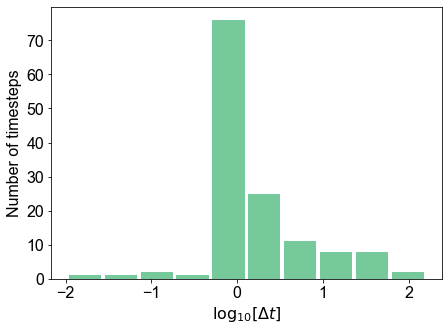

In [5]:
rvt.dthist()

### Scatter plot of each observable, each pipeline

Three observables (RV, S-index, and H$\alpha$) were each measured with two different pipelines (Terra and DRS). A long-term activity cycle is evident in S-index and H$\alpha$.

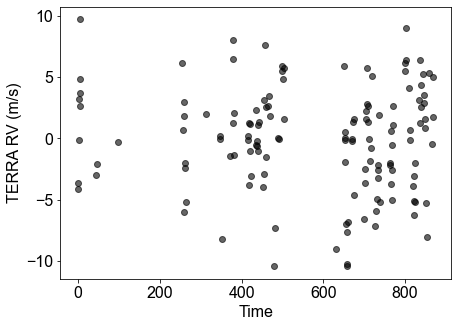

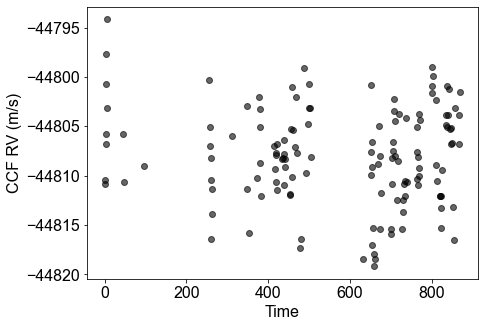

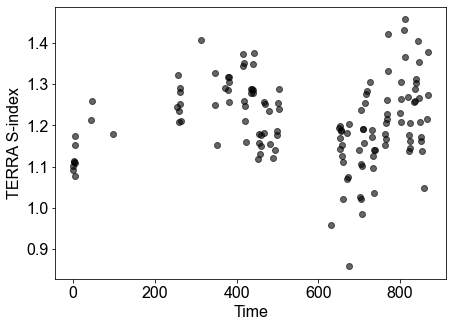

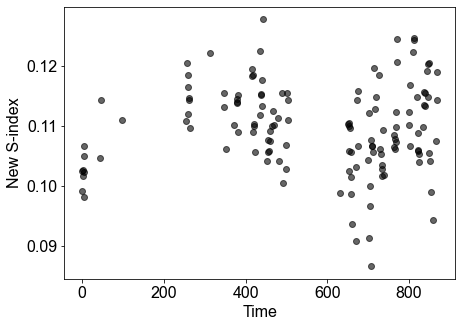

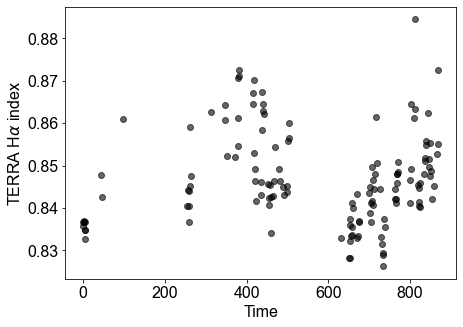

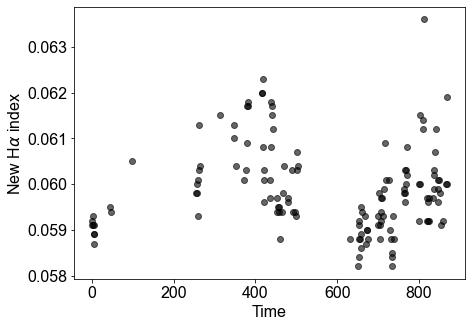

In [6]:
rvt.scatterplot(ylabel='TERRA RV (m/s)')
rvn.scatterplot(ylabel='CCF RV (m/s)')
st.scatterplot(ylabel='TERRA S-index')
sn.scatterplot(ylabel='New S-index')
hat.scatterplot(ylabel=r"TERRA H$\alpha$ index")
han.scatterplot(ylabel=r"New H$\alpha$ index")

### Create frequency grids

I chose a Nyquist-like frequency similar to 1/(median $\Delta t$). For severely uneven $\Delta t$ distributions, I'm more conservative and may restrict myself to lower frequencies.

In [7]:
rvt.frequency_grid(0.45, oversample=6)
rvn.frequency_grid(0.45, oversample=6)
st.frequency_grid(0.45, oversample=6)
sn.frequency_grid(0.45, oversample=6)
hat.frequency_grid(0.45, oversample=6)
han.frequency_grid(0.45, oversample=6)

### Quick Lomb-Scargle-like periodogram

We're not actually using the Lomb-Scargle algorithm, but the results should be the same.

In [8]:
rvt.pow_FT(N_bootstrap=2000)
rvn.pow_FT(N_bootstrap=2000)
st.pow_FT(N_bootstrap=2000)
sn.pow_FT(N_bootstrap=2000)
hat.pow_FT(N_bootstrap=2000)
han.pow_FT(N_bootstrap=2000)

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 0
Iteration 500
Iteration 1000
Iteration 1500


### Plot each periodogram

Vertical lines mark the orbital frequencies of candidate planets b and c. From top to bottom: Terra RV, DRS RV, Terra S-index, DRS S-index, Terra H$\alpha$, DRS H$\alpha$ (measured according to <a href="https://ui.adsabs.harvard.edu/abs/2013ApJ...764....3R/abstract">Robertson et al. 2013</a>).

If you look at the Terra S-index periodogram, you will see a local maximum within a resolution unit of planet c's frequency. This is only obvious on a semilog-y plot. No one looking at that local maximum would report it as a "real" signal (I wouldn't; it's almost certainly not significant when judged against a red noise model, which we are working on), but we will see that the oscillation at that frequency is highly coherent with RV.

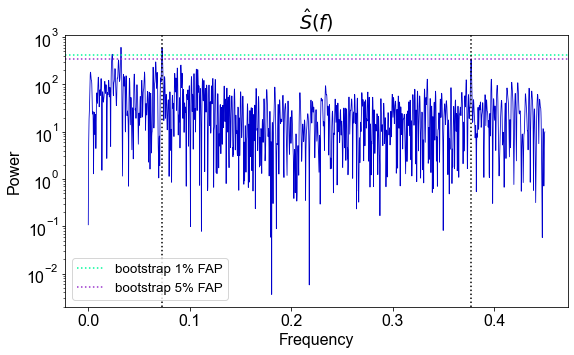

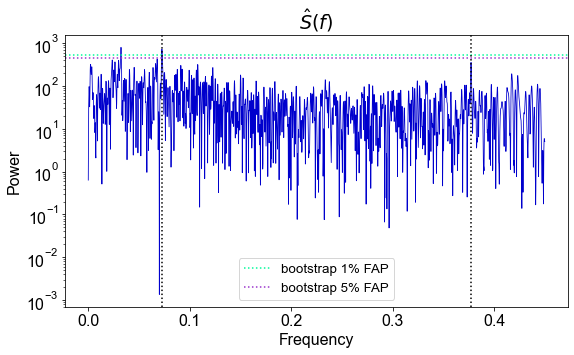

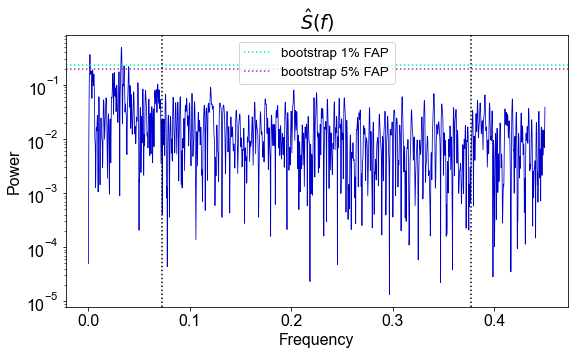

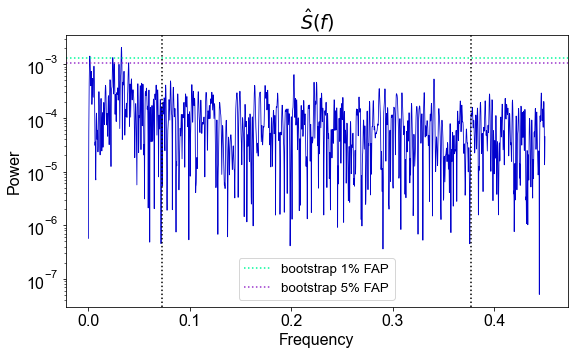

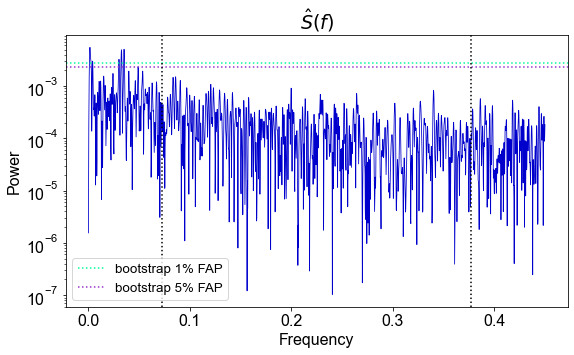

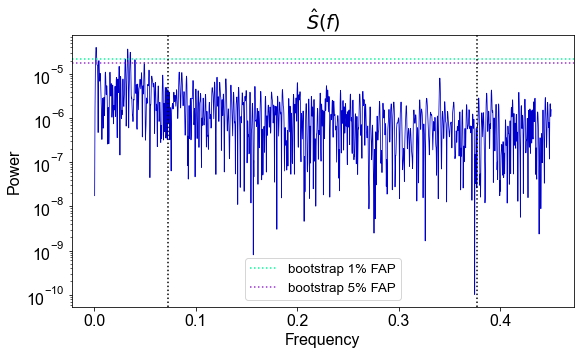

In [9]:
p1 = 1/13.74
p2 = 1/2.65
planets = [p1, p2] # Planet orbital frequencies

rvt.powplot(vlines=planets)
rvn.powplot(vlines=planets)

st.powplot(vlines=planets)
sn.powplot(vlines=planets)

hat.powplot(vlines=planets)
han.powplot(vlines=planets)

### The conservative implementation of Siegel's test supports the hypothesis that every time series is periodic

To search for up to three periodicities, set keyword <tt>tri=True</tt>.

In [10]:
rvt.Siegel_test()
rvn.Siegel_test()
st.Siegel_test()
sn.Siegel_test()
hat.Siegel_test()
han.Siegel_test()

T statistic: 0.04175
T threshold for rejecting white noise hypothesis at 5% level: 0.00376
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities
T statistic: 0.02823
T threshold for rejecting white noise hypothesis at 5% level: 0.00376
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities
T statistic: 0.06454
T threshold for rejecting white noise hypothesis at 5% level: 0.00376
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities
T statistic: 0.03680
T threshold for rejecting white noise hypothesis at 5% level: 0.00376
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities
T statistic: 0.09192
T threshold for rejecting white noise hypothesis at 5% level: 0.00376
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities
T statistic: 0.07512
T threshold for rejecting white noise hypothesis at 5% level: 0.00376
Null hypothesis rejected: 95% chance this ti

### Start the bivariate analysis: make <tt>Bivariate</tt> objects

I started by only computing coherences between time series measured with the same pipeline (Terra vs. Terra, DRS vs. DRS). Later I add cross-pipeline coherences.

In [11]:
rvt_st = Bi.Bivariate(data['JD-2456000'].to_numpy(), data['RVT'].to_numpy(), data['ST'].to_numpy())
rvt_hat = Bi.Bivariate(data['JD-2456000'].to_numpy(), data['RVT'].to_numpy(), data['HaT'].to_numpy())
st_hat = Bi.Bivariate(data['JD-2456000'].to_numpy(), data['ST'].to_numpy(), data['HaT'].to_numpy())

rvn_sn = Bi.Bivariate(data['JD-2456000'].to_numpy(), data['RVN'].to_numpy(), data['SN'].to_numpy())
rvn_han = Bi.Bivariate(data['JD-2456000'].to_numpy(), data['RVN'].to_numpy(), data['HaN'].to_numpy())
sn_han = Bi.Bivariate(data['JD-2456000'].to_numpy(), data['SN'].to_numpy(), data['HaN'].to_numpy())

Nyquist frequency from mean dt: 0.07770
Nyquist frequency from 10% trimmed mean dt: 0.15036
Nyquist frequency from 20% trimmed mean dt: 0.22828
Nyquist frequency from median dt: 0.49355
Rayleigh resolution: 0.00115
Nyquist frequency from mean dt: 0.07770
Nyquist frequency from 10% trimmed mean dt: 0.15036
Nyquist frequency from 20% trimmed mean dt: 0.22828
Nyquist frequency from median dt: 0.49355
Rayleigh resolution: 0.00115
Nyquist frequency from mean dt: 0.07770
Nyquist frequency from 10% trimmed mean dt: 0.15036
Nyquist frequency from 20% trimmed mean dt: 0.22828
Nyquist frequency from median dt: 0.49355
Rayleigh resolution: 0.00115
Nyquist frequency from mean dt: 0.07770
Nyquist frequency from 10% trimmed mean dt: 0.15036
Nyquist frequency from 20% trimmed mean dt: 0.22828
Nyquist frequency from median dt: 0.49355
Rayleigh resolution: 0.00115
Nyquist frequency from mean dt: 0.07770
Nyquist frequency from 10% trimmed mean dt: 0.15036
Nyquist frequency from 20% trimmed mean dt: 0.22

### Segment the data, select Blackman-Harris taper

The taper applied to segment 2 (orange on plot) is not great. This dataset is in the gray area re: tapering or not. I decided to use the taper because (1) it really does squash down the noise, (2) we're not dealing with a lot of high-cadence data right near the very beginning or very end of the observing time baseline, as in the dangerous 51 Peg b example (Figure 8 of the paper), and (3) with the segments overlapping, almost all of the data is still being "counted" even in the tapered dataset (i.e. we're not zeroing out a huge number of observations).

Number of data points per segment: 90
Number of segments: 2
Segment start and end points: [[  0  90]
 [ 45 136]]
Effective number of segments: 1.997116
Frequency grid spacing: 0.000232
Minimum 6-dB bandwidth: 0.003778
Mean 6-dB bandwidth, resolution limit: 0.005182
Best achievable Rayleigh resolution: 0.001389
Number of data points per segment: 90
Number of segments: 2
Segment start and end points: [[  0  90]
 [ 45 136]]
Effective number of segments: 1.997116
Frequency grid spacing: 0.000232
Minimum 6-dB bandwidth: 0.003778
Mean 6-dB bandwidth, resolution limit: 0.005182
Best achievable Rayleigh resolution: 0.001389
Number of data points per segment: 90
Number of segments: 2
Segment start and end points: [[  0  90]
 [ 45 136]]
Effective number of segments: 1.997116
Frequency grid spacing: 0.000232
Minimum 6-dB bandwidth: 0.003778
Mean 6-dB bandwidth, resolution limit: 0.005182
Best achievable Rayleigh resolution: 0.001389
Number of data points per segment: 90
Number of segments: 2
Segm

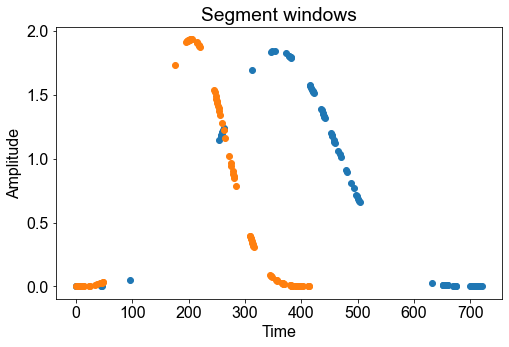

In [12]:
rvt_st.segment_data(2, 0.4, oversample=6, window='BlackmanHarris', plot_windows=True)
rvt_hat.segment_data(2, 0.4, oversample=6, window='BlackmanHarris')
st_hat.segment_data(2, 0.4, oversample=6, window='BlackmanHarris')
rvn_sn.segment_data(2, 0.4, oversample=6, window='BlackmanHarris')
rvn_han.segment_data(2, 0.4, oversample=6, window='BlackmanHarris')
sn_han.segment_data(2, 0.4, oversample=6, window='BlackmanHarris')

### Compute coherences and Welch's power spectra with bootstrap false alarm levels

You can speed this notebook WAY up by leaving out the bootstrap; you will still get analytical coherence FALs. I don't recommend skipping the bootstrap entirely, but's reasonable get a first look at the coherences without the bootstrap. There are unfortunately no analytical FALs for the Welch's power spectra.

In [13]:
rvt_st.Welch_coherence_powspec()
rvt_st.Welch_coherence_powspec_bootstrap()

rvt_hat.Welch_coherence_powspec()
rvt_hat.Welch_coherence_powspec_bootstrap()

st_hat.Welch_coherence_powspec()
st_hat.Welch_coherence_powspec_bootstrap()

rvn_sn.Welch_coherence_powspec()
rvn_sn.Welch_coherence_powspec_bootstrap()

rvn_han.Welch_coherence_powspec()
rvn_han.Welch_coherence_powspec_bootstrap()

sn_han.Welch_coherence_powspec()
sn_han.Welch_coherence_powspec_bootstrap()

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500

Mean number of false-alarm threshold crossings per Rayleigh resolution from bootstrap simulations:
5% FAP: 0.134
1% FAP: 0.056
0.1% FAP: 0.010

Number of false-alarm threshold crossings per Rayleigh resolution from actual data:
5% FAP: 0.132 crossings =  48.0350 %ile
1% FAP: 0.063 crossings =  64.7200 %ile
0.1% FAP: 0.007 crossings =  48.0350 %ile

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500

Mean number of false-alarm threshold crossings per Rayl

### Plot the Welch's power spectrum of each time series

You can also do this with <tt>Bivariate.Welch_pow_plot()</tt>.

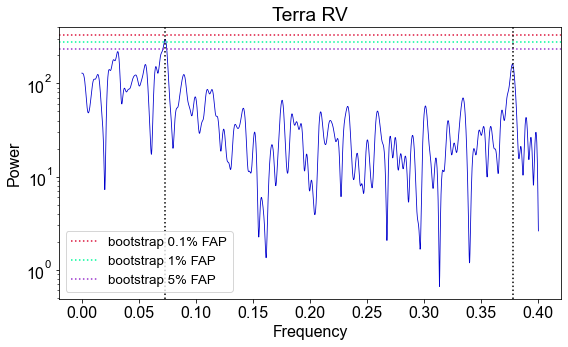

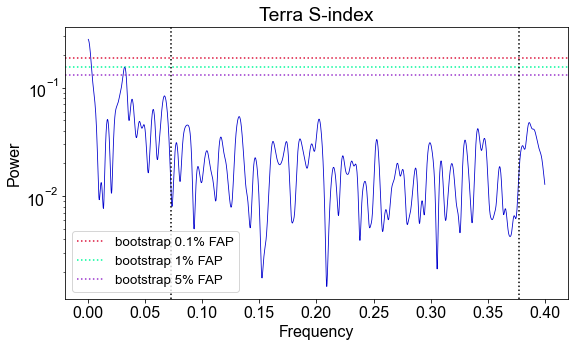

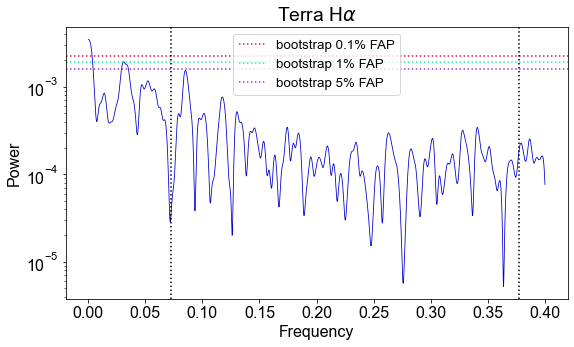

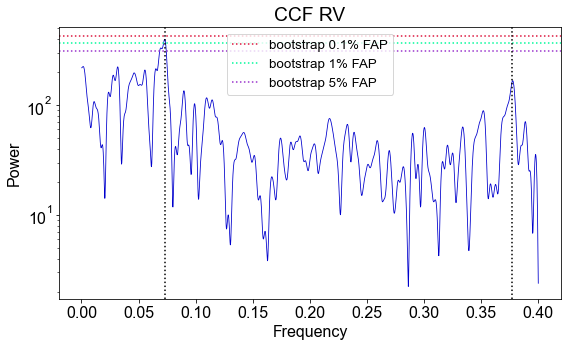

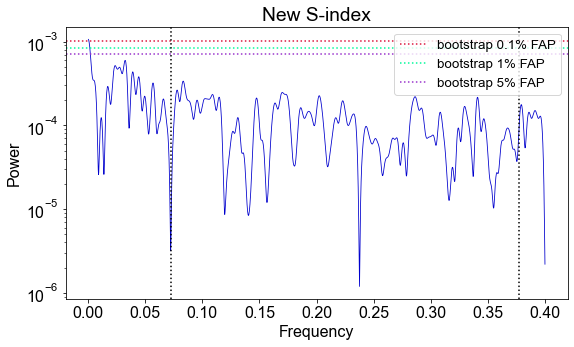

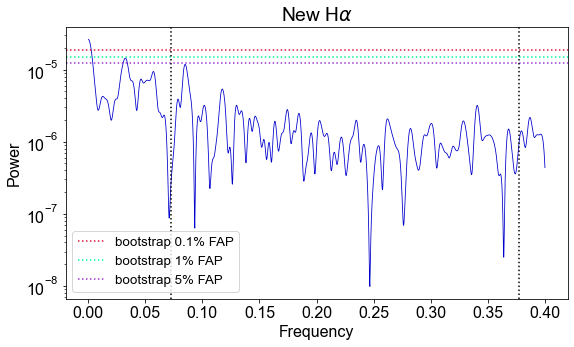

In [14]:
rvt_st.x_series.powplot(Welch=True, title='Terra RV', vlines=planets)
rvt_st.y_series.powplot(Welch=True, title='Terra S-index', vlines=planets)
rvt_hat.y_series.powplot(Welch=True, title=r"Terra H$\alpha$", vlines=planets)
rvn_sn.x_series.powplot(Welch=True, title='CCF RV', vlines=planets)
rvn_sn.y_series.powplot(Welch=True, title='New S-index', vlines=planets)
rvn_han.y_series.powplot(Welch=True, title=r"New H$\alpha$", vlines=planets)

### Quick plot of coherences

Here is where we start to see signals pop up at the planet orbital frequencies: Terra RV is highly coherent ($<1$% FAL) with Terra S-index at the frequency of planet c, ditto with DRS RV and DRS H$\alpha$ at the frequency of planet b. We also have potentially significant coherence signals between Terra H$\alpha$ & RV and DRS S-index & RV.

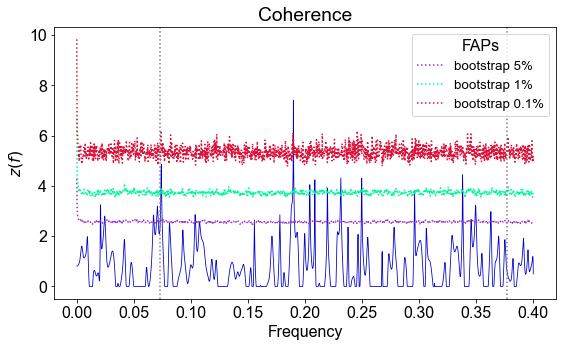

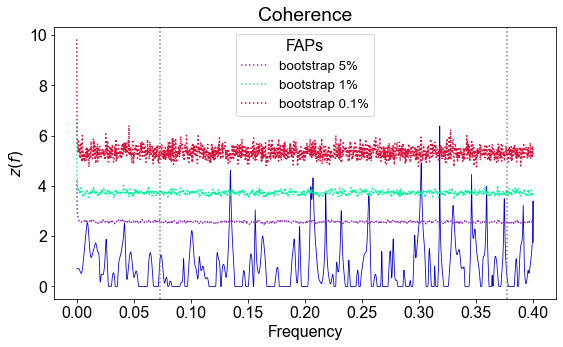

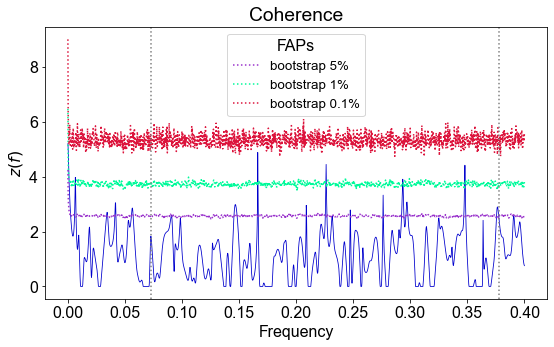

In [15]:
rvt_st.coh_plot(transformed=True, vlines=planets)
rvt_hat.coh_plot(transformed=True, vlines=planets)
st_hat.coh_plot(transformed=True, vlines=planets)

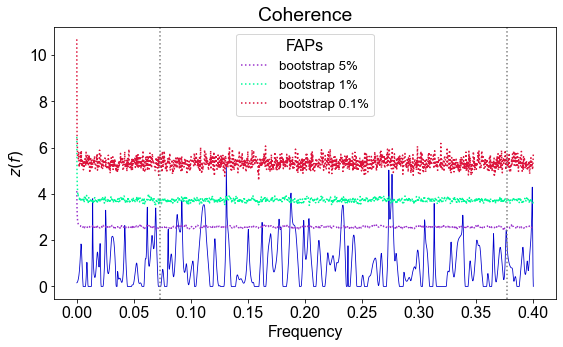

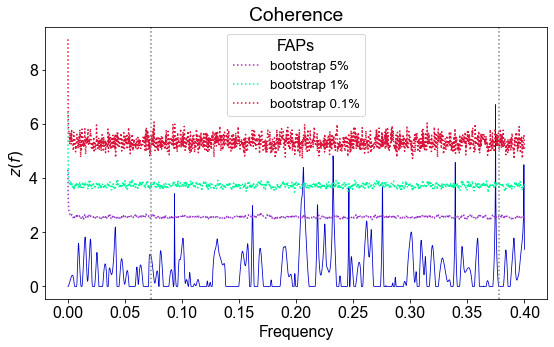

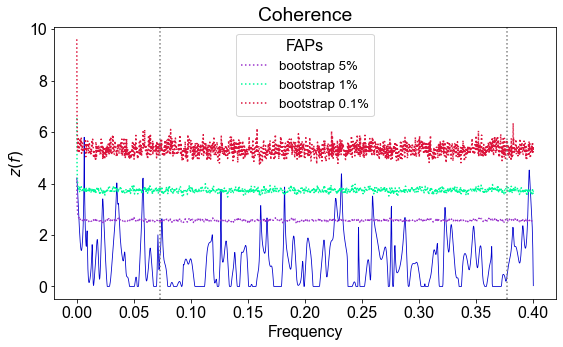

In [46]:
rvn_sn.coh_plot(transformed=True, vlines=planets)
rvn_han.coh_plot(transformed=True, vlines=planets)
sn_han.coh_plot(transformed=True, vlines=planets)

### Check the spectral windows

See if there are obvious sidelobes that could generate spurious signals. There aren't, but the lack of dynamic range in the spectral window is a frustratingly common feature of RV datasets.

Half bandwidth: 0.004181
Welch average spectral window not saved to file


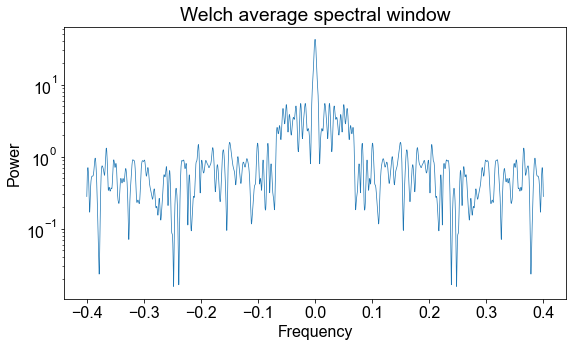

In [17]:
rvt_st.x_series.spectral_window_Welch()

Half bandwidth: 0.000767
Single-window results not saved


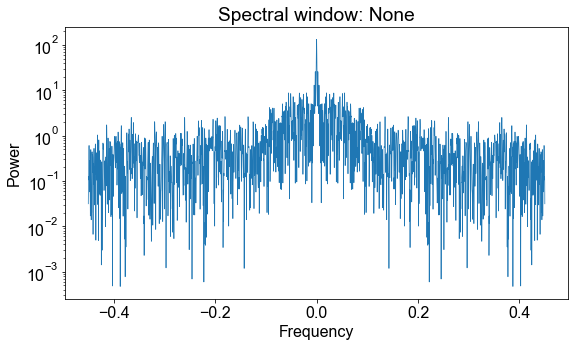

In [18]:
rvt.spectral_window()

### <tt>astropy</tt> Lomb-Scargle periodograms

In [19]:
from astropy.timeseries import LombScargle

pow_rv = LombScargle(data['JD-2456000'].to_numpy(), data['RVT'].to_numpy(), normalization='psd').power(rvt_st.pow_coh_grid)
pow_s = LombScargle(data['JD-2456000'].to_numpy(), data['ST'].to_numpy(), normalization='psd').power(rvt_st.pow_coh_grid)
pow_ha = LombScargle(data['JD-2456000'].to_numpy(), data['HaT'].to_numpy(), normalization='psd').power(rvt_st.pow_coh_grid)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)
/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: divide by zero encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


### Use the Welch's power spectra of the Terra-measured activity indicators to find the star rotation period

In [20]:
where_rot_S = np.argmax(rvt_st.y_series.Welch_pow[20:])
where_rot_Ha = np.argmax(rvt_hat.y_series.Welch_pow[20:])

frot_S = rvt_st.pow_coh_grid[20+where_rot_S]
frot_Ha = rvt_hat.pow_coh_grid[20+where_rot_Ha]
frot = np.mean([frot_S, frot_Ha])

print('Rotation frequency from S:', frot_S)
print('Rotation frequency from Ha:', frot_Ha)
print('Average rotation frequency:', frot, '\nAverage rotation period:', 1/frot)

Rotation frequency from S: 0.03205574912891984
Rotation frequency from Ha: 0.031126596980255494
Average rotation frequency: 0.03159117305458767 
Average rotation period: 31.654411764705902


### Nice plot of power spectra of Terra RV, S-index, H$\alpha$

This is Figure 18 of the paper.

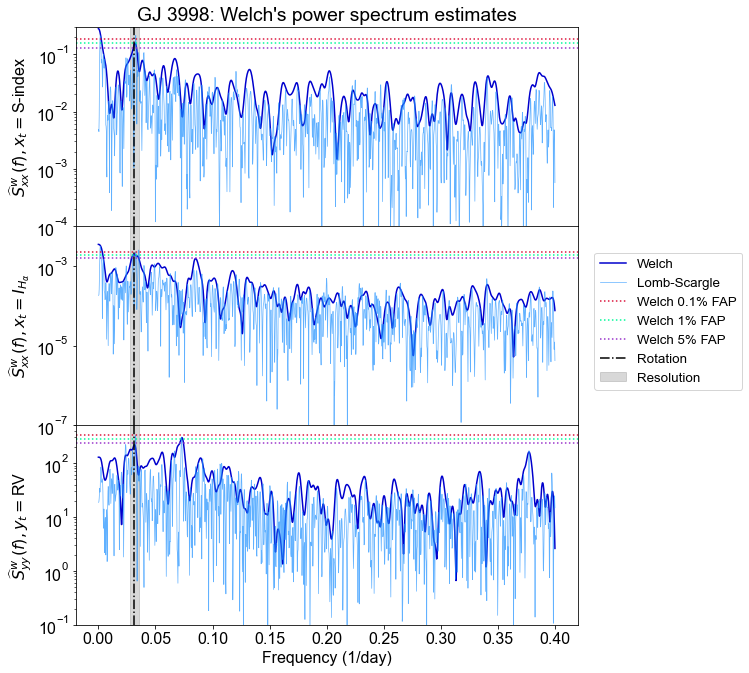

In [21]:
band = 0.0042

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(9,11))

ax1.semilogy(rvt_st.pow_coh_grid, rvt_st.y_series.Welch_pow, color='mediumblue', label='Welch')
ax1.semilogy(rvt_st.pow_coh_grid, pow_s, color='dodgerblue', alpha=0.7, lw=0.7, label='Lomb-Scargle')
ax1.axhline(rvt_st.ypow_Welch_false_alarm_01, color='crimson', ls=':', label='Welch 0.1% FAP')
ax1.axhline(rvt_st.ypow_Welch_false_alarm_1, color='mediumspringgreen', ls=':', label='Welch 1% FAP')
ax1.axhline(rvt_st.ypow_Welch_false_alarm_5, color='darkorchid', ls=':', label='Welch 5% FAP')
ax1.axvline(frot, color='k', ls='-.')
ax1.fill_between([frot-band,frot+band], [1e-4,1e-4], [0.3,0.3], color='gray', alpha=0.3)
ax1.set_ylabel(r"$\widehat{S}_{xx}^w(f), x_t = $S-index")
ax1.set_title(r"GJ 3998: Welch's power spectrum estimates")
ax1.set_ylim([1e-4,0.3])

ax2.semilogy(rvt_hat.pow_coh_grid, rvt_hat.y_series.Welch_pow, color='mediumblue', label='Welch')
ax2.semilogy(rvt_hat.pow_coh_grid, pow_ha, color='dodgerblue', alpha=0.7, lw=0.7, label='Lomb-Scargle')
ax2.axhline(rvt_hat.ypow_Welch_false_alarm_01, color='crimson', ls=':', label='Welch 0.1% FAP')
ax2.axhline(rvt_hat.ypow_Welch_false_alarm_1, color='mediumspringgreen', ls=':', label='Welch 1% FAP')
ax2.axhline(rvt_hat.ypow_Welch_false_alarm_5, color='darkorchid', ls=':', label='Welch 5% FAP')
ax2.axvline(frot, color='k', ls='-.', label='Rotation')
ax2.fill_between([frot-band,frot+band], [1e-7,1e-7], [0.01,0.01], color='gray', alpha=0.3, label='Resolution')
ax2.set_ylabel(r"$\widehat{S}_{xx}^w(f), x_t = I_{H_{\alpha}}$")
ax2.set_xlabel('Frequency (1/day)')
ax2.set_ylim([1e-7,1e-2])
ax2.legend(bbox_to_anchor=(1.02, 0.9), fontsize='small')

ax3.semilogy(rvt_st.pow_coh_grid, rvt_st.x_series.Welch_pow, color='mediumblue', label='Welch')
ax3.semilogy(rvt_st.pow_coh_grid, pow_rv, color='dodgerblue', alpha=0.7, lw=0.7, label='Lomb-Scargle')
ax3.axhline(rvt_st.xpow_Welch_false_alarm_01, color='crimson', ls=':', label='Welch 0.1% FAP')
ax3.axhline(rvt_st.xpow_Welch_false_alarm_1, color='mediumspringgreen', ls=':', label='Welch 1% FAP')
ax3.axhline(rvt_st.xpow_Welch_false_alarm_5, color='darkorchid', ls=':', label='Welch 5% FAP')
ax3.axvline(frot, color='k', ls='-.', label='Rotation')
ax3.fill_between([frot-band,frot+band], [0.1,0.1], [500,500], color='gray', alpha=0.3, label='Resolution')
ax3.set_ylabel(r"$\widehat{S}_{yy}^w(f), y_t = $RV")
ax3.set_xlabel('Frequency (1/day)')
ax3.set_ylim([0.1,500])

plt.subplots_adjust(hspace=0)

### Plot of segmenting and tapering scheme

This is Figure 7.

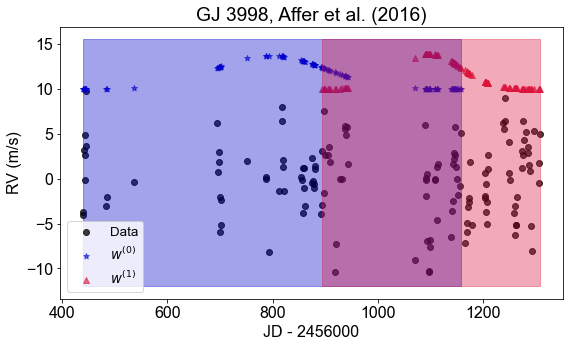

In [22]:
sg1 = range(rvt_st.x_series.segments[0,0], rvt_st.x_series.segments[0,1])
sg2 = range(rvt_st.x_series.segments[1,0], rvt_st.x_series.segments[1,1])

fig, ax = plt.subplots(1, 1, figsize=(9,5))
ax.scatter(data['JD-2456000'], rvt_st.x_series.obs, color='k', edgecolor='k', alpha=0.75, label='Data')
# ax2 = ax.twinx()
ax.scatter(data['JD-2456000'][sg1], 10+2*TimeSeries.BlackmanHarris(rvt_st.x_series.t[sg1]),
            color='mediumblue', edgecolor='mediumblue', alpha=0.6, marker='*', label=r"$w^{(0)}$")
ax.scatter(data['JD-2456000'][sg2], 10+2*TimeSeries.BlackmanHarris(rvt_st.x_series.t[sg2]-rvt_st.x_series.t[sg2][0]),
            color='crimson', edgecolor='crimson', alpha=0.6, marker='^', label=r"$w^{(1)}$")
ax.set_xlabel('JD - 2456000')
ax.set_ylabel('RV (m/s)')
ax.fill_between([data['JD-2456000'][0], data['JD-2456000'][sg1[-1]]], [-12,-12], [15.5,15.5], color='mediumblue', alpha=0.36)
ax.fill_between([data['JD-2456000'][sg2[0]], data['JD-2456000'][sg2[-1]]], [-12,-12], [15.5,15.5], color='crimson', alpha=0.36)
ax.set_title('GJ 3998, Affer et al. (2016)')
ax.legend(loc='best', fontsize='small')
# ax2.set_ylabel('Tapers')

### Save results of bivariate calculations

In [23]:
rvt_st.save_results("rvt_st.csv")
rvt_hat.save_results("rvt_hat.csv")
st_hat.save_results('st_hat.csv')
rvn_sn.save_results('rvd_sn.csv')
rvn_han.save_results('rvd_han.csv')
sn_han.save_results('sn_han.csv')

### Now we start cross-pipeline coherence measurements: Terra RV with DRS S-index, Terra RV with DRS H$\alpha$

If we're going to claim that the reported planets may be stellar signals, we want to be sure our conclusions don't come from a quirk of one of the pipelines.

In [24]:
rvt_sn = Bi.Bivariate(data['JD-2456000'].to_numpy(), data['RVT'].to_numpy(), data['SN'].to_numpy())
rvt_han = Bi.Bivariate(data['JD-2456000'].to_numpy(), data['RVT'].to_numpy(), data['HaN'].to_numpy())

rvt_sn.segment_data(2, 0.4, oversample=6, window='BlackmanHarris')
rvt_han.segment_data(2, 0.4, oversample=6, window='BlackmanHarris')

rvt_sn.Welch_coherence_powspec()
rvt_sn.Welch_coherence_powspec_bootstrap()

rvt_han.Welch_coherence_powspec()
rvt_han.Welch_coherence_powspec_bootstrap()

Nyquist frequency from mean dt: 0.07770
Nyquist frequency from 10% trimmed mean dt: 0.15036
Nyquist frequency from 20% trimmed mean dt: 0.22828
Nyquist frequency from median dt: 0.49355
Rayleigh resolution: 0.00115
Nyquist frequency from mean dt: 0.07770
Nyquist frequency from 10% trimmed mean dt: 0.15036
Nyquist frequency from 20% trimmed mean dt: 0.22828
Nyquist frequency from median dt: 0.49355
Rayleigh resolution: 0.00115
Number of data points per segment: 90
Number of segments: 2
Segment start and end points: [[  0  90]
 [ 45 136]]
Effective number of segments: 1.997116
Frequency grid spacing: 0.000232
Minimum 6-dB bandwidth: 0.003778
Mean 6-dB bandwidth, resolution limit: 0.005182
Best achievable Rayleigh resolution: 0.001389
Number of data points per segment: 90
Number of segments: 2
Segment start and end points: [[  0  90]
 [ 45 136]]
Effective number of segments: 1.997116
Frequency grid spacing: 0.000232
Minimum 6-dB bandwidth: 0.003778
Mean 6-dB bandwidth, resolution limit: 0

### Plot the cross-pipeline coherences

Terra RV and DRS H$\alpha$ don't have super high coherence at the frequency of planet b, but it does exceed the 5% false alarm level. Is 5% meaningful or not? We expect our view of false alarm levels to evolve as more coherence measurements make it into the literature (see last paragraph of Section 5).

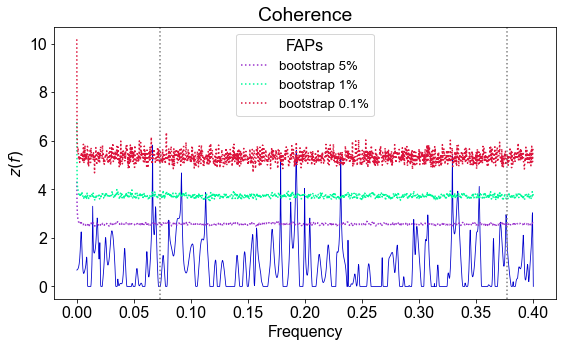

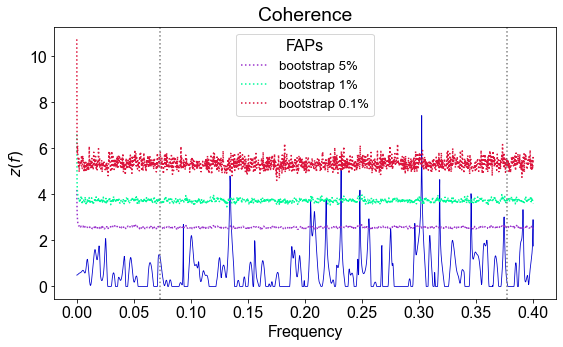

In [25]:
rvt_sn.coh_plot(transformed=True, vlines=planets)
rvt_han.coh_plot(transformed=True, vlines=planets)

### Continue cross-pipeline coherences: DRS RV with Terra S-index, DRS RV with Terra H$\alpha$

In [26]:
rvn_st = Bi.Bivariate(data['JD-2456000'].to_numpy(), data['RVN'].to_numpy(), data['ST'].to_numpy())
rvn_hat = Bi.Bivariate(data['JD-2456000'].to_numpy(), data['RVN'].to_numpy(), data['HaT'].to_numpy())

rvn_st.segment_data(2, 0.4, oversample=6, window='BlackmanHarris')
rvn_hat.segment_data(2, 0.4, oversample=6, window='BlackmanHarris')

rvn_st.Welch_coherence_powspec()
rvn_st.Welch_coherence_powspec_bootstrap()

rvn_hat.Welch_coherence_powspec()
rvn_hat.Welch_coherence_powspec_bootstrap()

Nyquist frequency from mean dt: 0.07770
Nyquist frequency from 10% trimmed mean dt: 0.15036
Nyquist frequency from 20% trimmed mean dt: 0.22828
Nyquist frequency from median dt: 0.49355
Rayleigh resolution: 0.00115
Nyquist frequency from mean dt: 0.07770
Nyquist frequency from 10% trimmed mean dt: 0.15036
Nyquist frequency from 20% trimmed mean dt: 0.22828
Nyquist frequency from median dt: 0.49355
Rayleigh resolution: 0.00115
Number of data points per segment: 90
Number of segments: 2
Segment start and end points: [[  0  90]
 [ 45 136]]
Effective number of segments: 1.997116
Frequency grid spacing: 0.000232
Minimum 6-dB bandwidth: 0.003778
Mean 6-dB bandwidth, resolution limit: 0.005182
Best achievable Rayleigh resolution: 0.001389
Number of data points per segment: 90
Number of segments: 2
Segment start and end points: [[  0  90]
 [ 45 136]]
Effective number of segments: 1.997116
Frequency grid spacing: 0.000232
Minimum 6-dB bandwidth: 0.003778
Mean 6-dB bandwidth, resolution limit: 0

### Quick plots

Again, we see RV-S coherence at the frequency of planet c, and RV-H$\alpha$ coherence at the frequency of planet b.

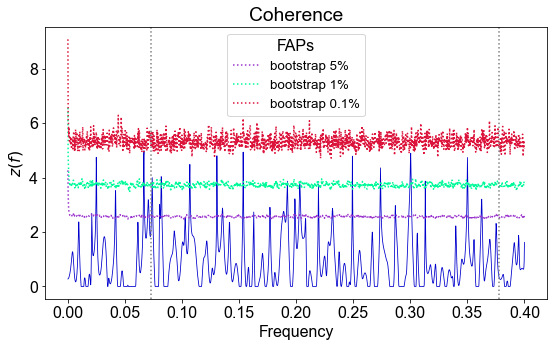

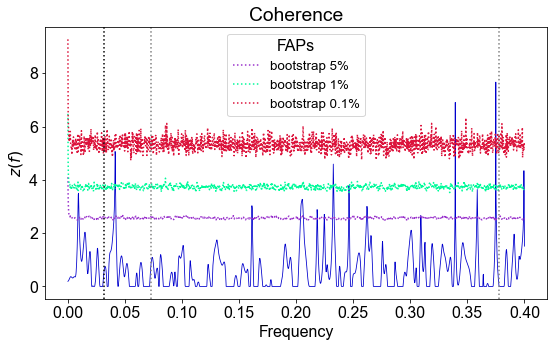

In [27]:
rvn_st.coh_plot(transformed=True, vlines=planets)
rvn_hat.coh_plot(transformed=True, vlines=planets)
plt.axvline(frot, color='k', ls=':')

### Try to measure the relative oscillation phases from each coherence measurement

Dotted line shows $\hat{\phi}(f)$ at all frequencies; blue points indicate frequencies where the coherence is statistically significant at the 1% level. Note that 180$\circ$ and $-180^{\circ}$ are the same frequency. It's possible to apply <tt>numpy.unwrap()</tt> to get a phase function without discontinuities.

We didn't show phase measurements in the paper, but they may be useful if you're trying to determine the physical origins of the coherent RV-activity indicator signals. We don't know very much about phase lags between various activity indicators.

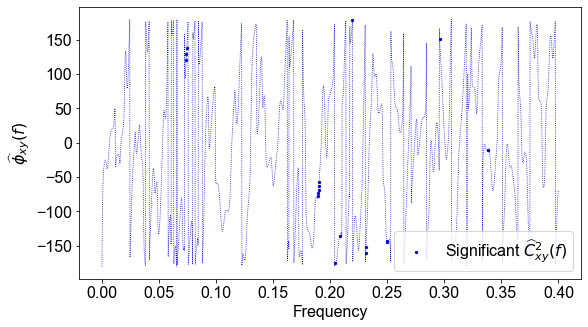

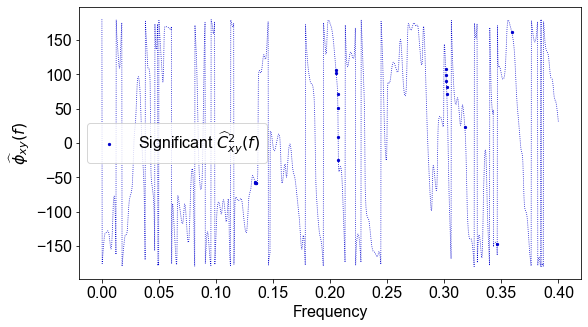

In [28]:
rvt_st.phase_plot()
rvt_hat.phase_plot()

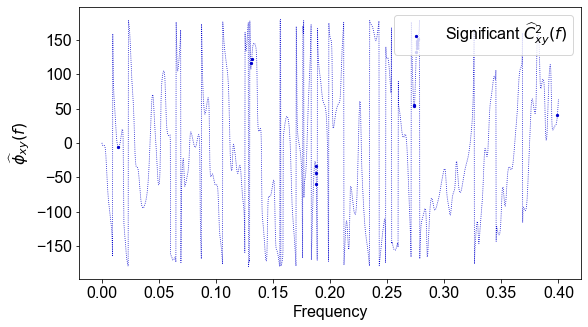

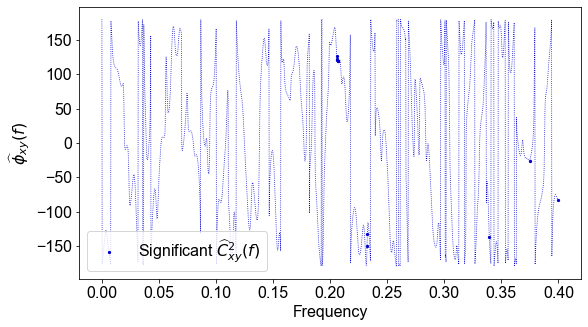

In [29]:
rvn_sn.phase_plot()
rvn_han.phase_plot()

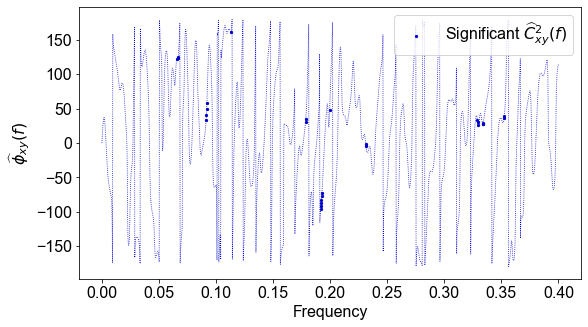

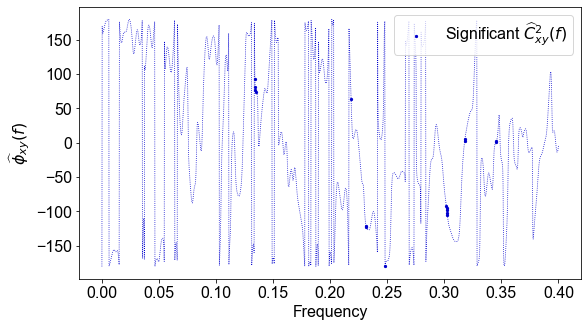

In [30]:
rvt_sn.phase_plot()
rvt_han.phase_plot()

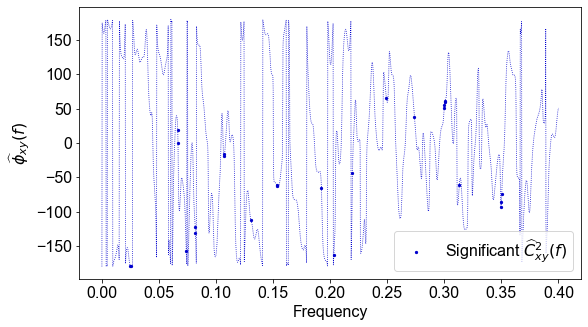

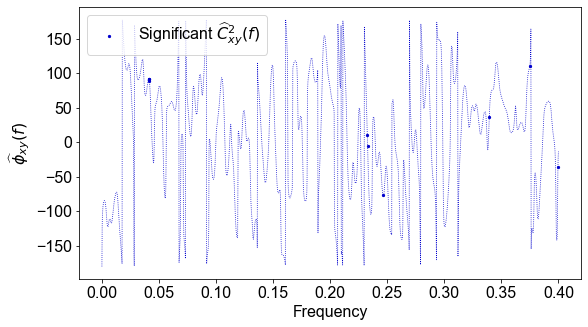

In [31]:
rvn_st.phase_plot()
rvn_hat.phase_plot()

### Quick scatter plots of $y_t$ (RV) vs. $x_t$ (activity indicator) to look for obvious linear trends

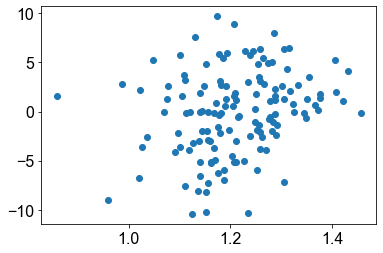

In [32]:
plt.scatter(data['ST'], data['RVT'])

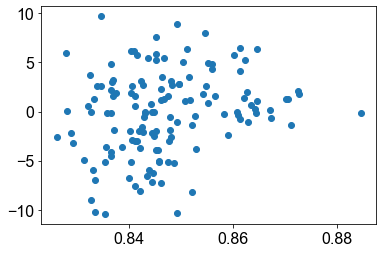

In [33]:
plt.scatter(data['HaT'], data['RVT'])

### Nice plot of coherences with S-index as $x_t$

This is Figure 19

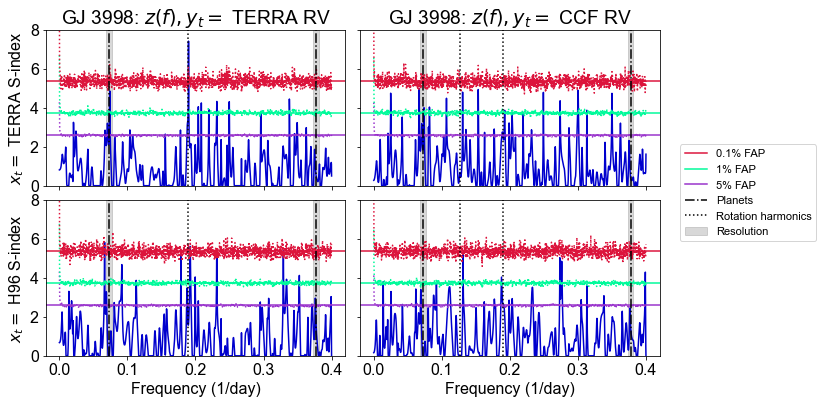

In [44]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(11,6))

ax1.plot(rvt_st.pow_coh_grid, rvt_st.coh_transformed, color='mediumblue')
ax1.plot(rvt_st.pow_coh_grid, rvt_st.coh_transformed_boot_5, color='darkorchid', ls=':')
ax1.plot(rvt_st.pow_coh_grid, rvt_st.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax1.plot(rvt_st.pow_coh_grid, rvt_st.coh_transformed_boot_01, color='crimson', ls=':')
ax1.axhline(Bi.ztrans(rvt_st.coh_prob_01, rvt_st.Nseg_eff), color='crimson', label='0.1% FAP')
ax1.axhline(Bi.ztrans(rvt_st.coh_prob_1, rvt_st.Nseg_eff), color='mediumspringgreen', label='1% FAP')
ax1.axhline(Bi.ztrans(rvt_st.coh_prob_5, rvt_st.Nseg_eff), color='darkorchid', label='5% FAP')
ax1.axvline(p1, color='k', ls='-.', label='planet b')
ax1.axvline(p2, color='k', ls='-.')
ax1.axvline(6*frot, color='k', ls=':', label=r"$6 f_{\rm rot}$")
for p in planets:
    ax1.fill_between([p-band, p+band], [0,0], [8,8], color='gray', alpha=0.3, label='Resolution')
ax1.set_ylim([0,8])
# ax1.legend(loc='upper right', ncol=2, fontsize='x-small', framealpha=1)
ax1.set_ylabel(r"$x_t = $ TERRA S-index", fontsize='medium')
ax1.set_title(r"GJ 3998: $z(f), y_t =$ TERRA RV")

ax2.plot(rvn_st.pow_coh_grid, rvn_st.coh_transformed, color='mediumblue')
ax2.plot(rvn_st.pow_coh_grid, rvn_st.coh_transformed_boot_5, color='darkorchid', ls=':')
ax2.plot(rvn_st.pow_coh_grid, rvn_st.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax2.plot(rvn_st.pow_coh_grid, rvn_st.coh_transformed_boot_01, color='crimson', ls=':')
ax2.axhline(Bi.ztrans(rvn_st.coh_prob_01, rvn_st.Nseg_eff), color='crimson', label='0.1% FAP')
ax2.axhline(Bi.ztrans(rvn_st.coh_prob_1, rvn_st.Nseg_eff), color='mediumspringgreen', label='1% FAP')
ax2.axhline(Bi.ztrans(rvn_st.coh_prob_5, rvn_st.Nseg_eff), color='darkorchid', label='5% FAP')
ax2.axvline(p1, color='k', ls='-.', label='Planets')
ax2.axvline(p2, color='k', ls='-.')
ax2.axvline(4*frot, color='k', ls=':', label='Rotation harmonics')
ax2.axvline(6*frot, color='k', ls=':', )
ax2.fill_between([p1-band, p1+band], [0,0], [8,8], color='gray', alpha=0.3, label='Resolution')
ax2.fill_between([p2-band, p2+band], [0,0], [8,8], color='gray', alpha=0.3)

ax2.legend(bbox_to_anchor=(1.05, 0.3), fontsize='x-small')
ax2.set_title(r"GJ 3998: $z(f), y_t =$ CCF RV")

ax3.plot(rvt_sn.pow_coh_grid, rvt_sn.coh_transformed, color='mediumblue')
ax3.plot(rvt_sn.pow_coh_grid, rvt_sn.coh_transformed_boot_5, color='darkorchid', ls=':')
ax3.plot(rvt_sn.pow_coh_grid, rvt_sn.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax3.plot(rvt_sn.pow_coh_grid, rvt_sn.coh_transformed_boot_01, color='crimson', ls=':')
ax3.axhline(Bi.ztrans(rvt_sn.coh_prob_01, rvt_sn.Nseg_eff), color='crimson')
ax3.axhline(Bi.ztrans(rvt_sn.coh_prob_1, rvt_sn.Nseg_eff), color='mediumspringgreen')
ax3.axhline(Bi.ztrans(rvt_sn.coh_prob_5, rvt_sn.Nseg_eff), color='darkorchid')
ax3.axvline(p1, color='k', ls='-.', label='planets')
ax3.axvline(p2, color='k', ls='-.')
ax3.axvline(6*frot, color='k', ls=':', label=r"$6 f_{\rm rot}$")
ax3.fill_between([p1-band, p1+band], [0,0], [8,8], color='gray', alpha=0.3)
ax3.fill_between([p2-band, p2+band], [0,0], [8,8], color='gray', alpha=0.3)
ax3.set_ylim([0,8])
# ax3.legend(loc='upper right', ncol=2, fontsize='x-small', framealpha=1)
ax3.set_ylabel(r"$x_t = $ H96 S-index", fontsize='medium')
ax3.set_xlabel('Frequency (1/day)')

ax4.plot(rvn_sn.pow_coh_grid, rvn_sn.coh_transformed, color='mediumblue')
ax4.plot(rvn_sn.pow_coh_grid, rvn_sn.coh_transformed_boot_5, color='darkorchid', ls=':')
ax4.plot(rvn_sn.pow_coh_grid, rvn_sn.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax4.plot(rvn_sn.pow_coh_grid, rvn_sn.coh_transformed_boot_01, color='crimson', ls=':')
ax4.axhline(Bi.ztrans(rvn_sn.coh_prob_01, rvn_sn.Nseg_eff), color='crimson')
ax4.axhline(Bi.ztrans(rvn_sn.coh_prob_1, rvn_sn.Nseg_eff), color='mediumspringgreen')
ax4.axhline(Bi.ztrans(rvn_sn.coh_prob_5, rvn_sn.Nseg_eff), color='darkorchid')
ax4.axvline(p1, color='k', ls='-.')
ax4.axvline(p2, color='k', ls='-.')
ax4.axvline(4*frot, color='k', ls=':', label=r"$4 f_{\rm rot}$")
ax4.axvline(6*frot, color='k', ls=':', label=r"$6 f_{\rm rot}$")
for p in planets:
    ax4.fill_between([p-band, p+band], [0,0], [8,8], color='gray', alpha=0.3)
# ax4.legend(loc='upper right', ncol=2, fontsize='x-small', framealpha=1)
ax4.set_xlabel('Frequency (1/day)')

plt.subplots_adjust(wspace=0.05, hspace=0.09)

### Nice plot of coherences with H$\alpha$ as $x_t$

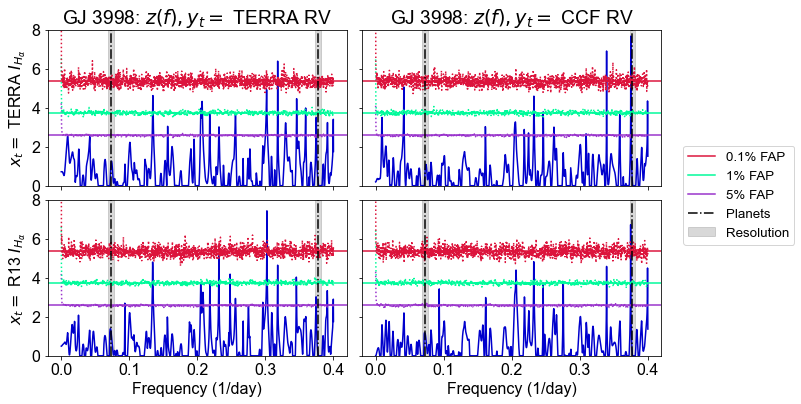

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(11,6))

ax1.plot(rvt_hat.pow_coh_grid, rvt_hat.coh_transformed, color='mediumblue')
ax1.plot(rvt_hat.pow_coh_grid, rvt_hat.coh_transformed_boot_5, color='darkorchid', ls=':')
ax1.plot(rvt_hat.pow_coh_grid, rvt_hat.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax1.plot(rvt_hat.pow_coh_grid, rvt_hat.coh_transformed_boot_01, color='crimson', ls=':')
ax1.axhline(Bi.ztrans(rvt_hat.coh_prob_01, rvt_hat.Nseg_eff), color='crimson', label='0.1% FAP')
ax1.axhline(Bi.ztrans(rvt_hat.coh_prob_1, rvt_hat.Nseg_eff), color='mediumspringgreen', label='1% FAP')
ax1.axhline(Bi.ztrans(rvt_hat.coh_prob_5, rvt_hat.Nseg_eff), color='darkorchid', label='5% FAP')
ax1.axvline(p1, color='k', ls='-.', label='planet b')
ax1.axvline(p2, color='k', ls='-.')
# ax1.axvline(4*frot, color='k', ls=':', label=r"$6 f_{\rm rot}$")
for p in planets:
    ax1.fill_between([p-band, p+band], [0,0], [8,8], color='gray', alpha=0.3, label='Resolution')
ax1.set_ylim([0,8])
# ax1.legend(loc='upper right', ncol=2, fontsize='x-small', framealpha=1)
ax1.set_ylabel(r"$x_t = $ TERRA $I_{H_{\alpha}}$", fontsize='medium')
ax1.set_title(r"GJ 3998: $z(f), y_t =$ TERRA RV")

ax2.plot(rvn_hat.pow_coh_grid, rvn_hat.coh_transformed, color='mediumblue')
ax2.plot(rvn_hat.pow_coh_grid, rvn_hat.coh_transformed_boot_5, color='darkorchid', ls=':')
ax2.plot(rvn_hat.pow_coh_grid, rvn_hat.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax2.plot(rvn_hat.pow_coh_grid, rvn_hat.coh_transformed_boot_01, color='crimson', ls=':')
ax2.axhline(Bi.ztrans(rvn_hat.coh_prob_01, rvn_hat.Nseg_eff), color='crimson', label='0.1% FAP')
ax2.axhline(Bi.ztrans(rvn_hat.coh_prob_1, rvn_hat.Nseg_eff), color='mediumspringgreen', label='1% FAP')
ax2.axhline(Bi.ztrans(rvn_hat.coh_prob_5, rvn_hat.Nseg_eff), color='darkorchid', label='5% FAP')
ax2.axvline(p1, color='k', ls='-.', label='Planets')
ax2.axvline(p2, color='k', ls='-.')
ax2.fill_between([p1-band, p1+band], [0,0], [8,8], color='gray', alpha=0.3, label='Resolution')
ax2.fill_between([p2-band, p2+band], [0,0], [8,8], color='gray', alpha=0.3)

ax2.legend(bbox_to_anchor=(1.05, 0.3), fontsize='small')
ax2.set_title(r"GJ 3998: $z(f), y_t =$ CCF RV")

ax3.plot(rvt_han.pow_coh_grid, rvt_han.coh_transformed, color='mediumblue')
ax3.plot(rvt_han.pow_coh_grid, rvt_han.coh_transformed_boot_5, color='darkorchid', ls=':')
ax3.plot(rvt_han.pow_coh_grid, rvt_han.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax3.plot(rvt_han.pow_coh_grid, rvt_han.coh_transformed_boot_01, color='crimson', ls=':')
ax3.axhline(Bi.ztrans(rvt_han.coh_prob_01, rvt_han.Nseg_eff), color='crimson')
ax3.axhline(Bi.ztrans(rvt_han.coh_prob_1, rvt_han.Nseg_eff), color='mediumspringgreen')
ax3.axhline(Bi.ztrans(rvt_han.coh_prob_5, rvt_han.Nseg_eff), color='darkorchid')
ax3.axvline(p1, color='k', ls='-.', label='planets')
ax3.axvline(p2, color='k', ls='-.')
# ax3.axvline(4*frot, color='k', ls=':', label=r"$6 f_{\rm rot}$")
ax3.fill_between([p1-band, p1+band], [0,0], [8,8], color='gray', alpha=0.3)
ax3.fill_between([p2-band, p2+band], [0,0], [8,8], color='gray', alpha=0.3)
ax3.set_ylim([0,8])
# ax3.legend(loc='upper right', ncol=2, fontsize='x-small', framealpha=1)
ax3.set_ylabel(r"$x_t = $ R13 $I_{H_{\alpha}}$", fontsize='medium')
ax3.set_xlabel('Frequency (1/day)')

ax4.plot(rvn_han.pow_coh_grid, rvn_han.coh_transformed, color='mediumblue')
ax4.plot(rvn_han.pow_coh_grid, rvn_han.coh_transformed_boot_5, color='darkorchid', ls=':')
ax4.plot(rvn_han.pow_coh_grid, rvn_han.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax4.plot(rvn_han.pow_coh_grid, rvn_han.coh_transformed_boot_01, color='crimson', ls=':')
ax4.axhline(Bi.ztrans(rvn_han.coh_prob_01, rvn_han.Nseg_eff), color='crimson')
ax4.axhline(Bi.ztrans(rvn_han.coh_prob_1, rvn_han.Nseg_eff), color='mediumspringgreen')
ax4.axhline(Bi.ztrans(rvn_han.coh_prob_5, rvn_han.Nseg_eff), color='darkorchid')
ax4.axvline(p1, color='k', ls='-.')
ax4.axvline(p2, color='k', ls='-.')
for p in planets:
    ax4.fill_between([p-band, p+band], [0,0], [8,8], color='gray', alpha=0.3)
# ax4.legend(loc='upper right', ncol=2, fontsize='x-small', framealpha=1)
ax4.set_xlabel('Frequency (1/day)')

plt.subplots_adjust(wspace=0.05, hspace=0.09)

In [36]:
1/30.7 - 1/42.5

0.009043878137574249

### Welch's vs. Lomb-Scargle spectral window

This plot is not in the paper, but it's similar to Figures 9 and 12.

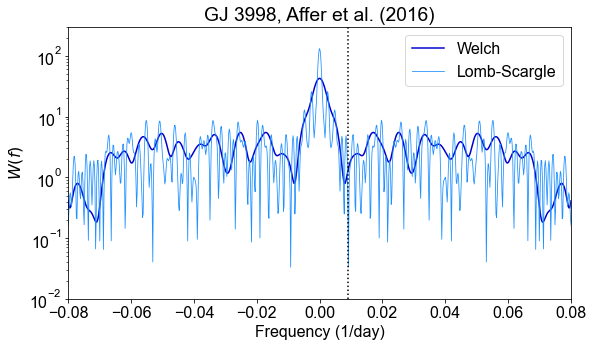

In [37]:
plt.figure(figsize=(9,5))
plt.semilogy(rvt_st.x_series.Welch_fgrid, rvt_st.x_series.Welch_window_function, color='mediumblue', label='Welch')
plt.semilogy(rvt.fgrid, rvt.window_function, color='dodgerblue', lw=0.8, label='Lomb-Scargle')
plt.xlabel('Frequency (1/day)')
plt.ylabel(r"$W(f)$")
plt.xlim([-0.08,0.08])
plt.ylim([1e-2,3e2])
plt.axvline(0.00904, ls=':', color='k')
plt.title('GJ 3998, Affer et al. (2016)')
plt.legend(loc='best')

In [38]:
print(frot, 1/frot)

0.03159117305458767 31.654411764705902


In [39]:
print(1/frot_S, 1/frot_Ha)

31.19565217391306 32.126865671641816


In [40]:
print(frot_S, frot_Ha)

0.03205574912891984 0.031126596980255494


### Relative phase plots highlighting the orbital frequencies of the planet candidates

RV and H$\alpha$ are nearly in-phase at the frequency of planet candidate b. RV and S-index look to be 180 degrees out of phase at the frequency of planet candidate c. 

Text(0.5, 0, 'Frequency (1/day)')

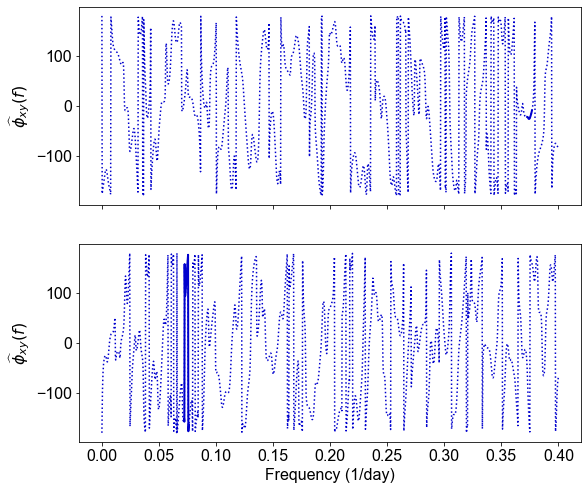

In [41]:
where_b = np.argmax(rvn_han.coh_transformed)
where_c = np.argmax(rvt_st.coh_transformed[0:500])
band_b = np.where(np.abs(rvn_han.pow_coh_grid-rvn_han.pow_coh_grid[where_b]) < band/2)[0]
band_c = np.where(np.abs(rvt_st.pow_coh_grid-rvt_st.pow_coh_grid[where_c]) < band/2)[0]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9,8))

ax1.plot(rvn_han.pow_coh_grid, rvn_han.phase, color='mediumblue', ls=':')
ax1.plot(rvn_han.pow_coh_grid[band_b], rvn_han.phase[band_b], color='mediumblue', lw=2)
ax1.set_ylabel(r"$\widehat{\phi}_{xy}(f)$")

ax2.plot(rvt_st.pow_coh_grid, rvt_st.phase, color='mediumblue', ls=':')
ax2.plot(rvt_st.pow_coh_grid[band_c], rvt_st.phase[band_c], color='mediumblue', lw=2)
ax2.set_ylabel(r"$\widehat{\phi}_{xy}(f)$")
ax2.set_xlabel('Frequency (1/day)')